#Ada Fender

# Project \#1:
Your first step is to decide which dataset you would like to work with for this project.

For this project, you will get to choose what dataset you use. The ones we've used in class (other than Iris/Titanic as they're pretty small) are all fair game (wine quality, breast cancer, spotify).

# Self-Evaluation:

| **Description/Writing** | **I think I deserve** |
|-------------------------|-----------------------|
| 1: Problem              | 2/2                    |
| 2: Data Prep            | 2/2                    |
| 3: Research             | 10/10                   |
| 4: Analysis             | 10/10                   |
| 5: Bumps in the Road.   | 1/1                    |
| Total                   | 25/25                   |

# 1. Problem:
State the problem you are trying to solve with this machine learning experiment. Include a description of the data, where you got the data, and what you're trying to predict..

I am using the pokemon dataset from class. The pokemon dataset includes a list of all pokemon from generations 1-6 and the following columns of data about their traits/statistics: Number, Name,	Type 1,	Type 2,	Total	HP,	Attack,	Defense,	Sp. Atk,	Sp. Def,	Speed,	Generation, and	Legendary (a boolean).

I intend to predict what the speed of a pokemon will be based on their other stats.

# 2. Data Preparation
Explain your data preparation. What did you have to do to get your data in shape for your experiments? Why are you certain that you data is clean and prepared for use in your algorithms?

In order to get my data in shape for the experiments, I needed to address any missing data and string values.

I dropped the # and Name columns since these values are unique to each pokemon and wouldn't aid in prediction. Only the column Type 2 has missing data since some pokemon only have one type. To fix this, I filled those rows with "None" as their Type 2 value.

I also needed to convert the string values in the Type 1, Type 2, and Legendary columns into integers so they could be sorted, so I did that with LabelEncoder.

Then, I split the data into testing and training datasets for use in the algorithms.

In [92]:
import sklearn
import pandas
from google.colab import drive

drive.mount('/content/drive')
poke = pandas.read_csv('/content/drive/MyDrive/CS167/Datasets/pokemon.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [93]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import neighbors
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [94]:
poke.head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


In [95]:
poke.drop('#', axis=1, inplace=True)
poke.drop('Name', axis=1, inplace=True)
poke["Type 2"].fillna("None")

poke[['Type 1', 'Type 2', 'Legendary']] = poke[['Type 1', 'Type 2', 'Legendary']].apply(LabelEncoder().fit_transform)

target = "Speed"
predictors = poke.columns.drop(target)
train_data, test_data, train_sln, test_sln = train_test_split(poke[predictors], poke[target], test_size = 0.2, random_state=42)

poke.head(10)

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,9,13,318,45,49,49,65,65,45,1,0
1,9,13,405,60,62,63,80,80,60,1,0
2,9,13,525,80,82,83,100,100,80,1,0
3,9,13,625,80,100,123,122,120,80,1,0
4,6,18,309,39,52,43,60,50,65,1,0
5,6,18,405,58,64,58,80,65,80,1,0
6,6,7,534,78,84,78,109,85,100,1,0
7,6,2,634,78,130,111,130,85,100,1,0
8,6,7,634,78,104,78,159,115,100,1,0
9,17,18,314,44,48,65,50,64,43,1,0


# 3. Research

Put your code and your experiments here.

For full credit, your experiments should include the following models:
- __k Nearest Neighbors__
- __weighted k Nearest Neighbors__
- __decision tree__
- __random forest__

You need to demonstrate the performance of these models on both __normalized__ and __non-normalized__ data.

For each of the above models, you need to include a __graph of at least 1 tuned parameter__.


In [55]:
from sklearn import neighbors
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

In [23]:
# normalizing the data:
scaler = StandardScaler()

scaler.fit(train_data)
train_data_normalized = scaler.transform(train_data)
test_data_normalized = scaler.transform(test_data)

#kNN Models

In [91]:
# to find best k value:
for k in range(1, 12): # I initially did a range 1 to 105, but just so my work was easier to scroll through I changed it here
    my_knn = neighbors.KNeighborsRegressor(n_neighbors=k)
    #for weighted: my_knn = neighbors.KNeighborsRegressor(n_neighbors=k, weights='distance')
    my_knn.fit(train_data, train_sln)
    predictions = my_knn.predict(test_data)
    print("MAE for ", k, " ", mean_absolute_error(test_sln, predictions))

MAE for  1   15.1875
MAE for  2   12.990625
MAE for  3   12.322916666666666
MAE for  4   12.1203125
MAE for  5   11.966249999999999
MAE for  6   11.656250000000002
MAE for  7   11.940178571428572
MAE for  8   12.015625
MAE for  9   12.255555555555555
MAE for  10   12.41375
MAE for  11   12.775568181818183


In [56]:
# kNN
knn = neighbors.KNeighborsRegressor(n_neighbors=6)
knn.fit(train_data, train_sln)
knn_predictions = knn.predict(test_data)
print("MAE for kNN: ", mean_absolute_error(test_sln, knn_predictions))

# kNN on normalized data
norm_knn = neighbors.KNeighborsRegressor(n_neighbors=6)
norm_knn.fit(train_data_normalized, train_sln)
norm_knn_predictions = norm_knn.predict(test_data_normalized)
print("MAE for kNN on normalized data: ", mean_absolute_error(test_sln, norm_knn_predictions))

MAE for kNN:  11.656250000000002
MAE for kNN on normalized data:  17.0875


In [57]:
# weighted kNN
knn_weighted = neighbors.KNeighborsRegressor(n_neighbors=6, weights='distance')
knn_weighted.fit(train_data, train_sln)
knn_weighted_predictions = knn_weighted.predict(test_data)
print("MAE for weighted kNN: ", mean_absolute_error(test_sln, knn_weighted_predictions))

# weighted kNN on normalized data
norm_knn_weighted = neighbors.KNeighborsRegressor(n_neighbors=6, weights='distance')
norm_knn_weighted.fit(train_data_normalized, train_sln)
norm_knn_weighted_predictions = norm_knn_weighted.predict(test_data_normalized)
print("MAE for weighted kNN on normalized data: ", mean_absolute_error(test_sln, norm_knn_weighted_predictions))

MAE for weighted kNN:  11.32786693281952
MAE for weighted kNN on normalized data:  16.82244963986987


#Decision Tree

In [67]:
# to find best max_depth for decision tree:
for d in range(1, 12):
    my_dt = tree.DecisionTreeRegressor(max_depth=d)
    my_dt.fit(train_data,train_sln)
    predictions = my_dt.predict(test_data)
    print("MAE for ", d, " ", mean_absolute_error(test_sln, predictions))

MAE for  1   19.63972552312064
MAE for  2   18.57240889802192
MAE for  3   18.05456071065178
MAE for  4   16.439493044963083
MAE for  5   16.78967387494042
MAE for  6   17.43458196341505
MAE for  7   17.348648520747865
MAE for  8   18.625960726653073
MAE for  9   18.105604664809828
MAE for  10   18.60159642440892
MAE for  11   18.29479166666667


In [49]:
# decision tree
dt = tree.DecisionTreeRegressor(max_depth=4)
dt.fit(train_data,train_sln)
dt_predictions = dt.predict(test_data)
print("MAE for decision tree: ", mean_absolute_error(test_sln, dt_predictions))

# decision tree on normalized data
norm_dt = tree.DecisionTreeRegressor(max_depth=4)
norm_dt.fit(train_data_normalized,train_sln)
norm_dt_predictions = norm_dt.predict(test_data_normalized)
print("MAE for decision tree on normalized data: ", mean_absolute_error(test_sln, norm_dt_predictions))

MAE for decision tree:  16.439493044963083
MAE for decision tree on normalized data:  16.439493044963083


#Random Forest

In [105]:
# to find best amount of trees for random forest:
for n in range(165,175): #I did this initially through 200 but here am just showing a portion so it's easier to scroll through
    my_rf = RandomForestRegressor(n_estimators=n, random_state=0)
    my_rf.fit(train_data,train_sln)
    predictions = my_rf.predict(test_data)
    print("MAE for ", n, " ", mean_absolute_error(test_sln, predictions))

MAE for  165   12.243901515151515
MAE for  166   12.234939759036145
MAE for  167   12.2248877245509
MAE for  168   12.209747023809523
MAE for  169   12.201627218934911
MAE for  170   12.20735294117647
MAE for  171   12.215350877192984
MAE for  172   12.221184593023256
MAE for  173   12.218063583815029
MAE for  174   12.231465517241379


In [101]:
# random forest
forest = RandomForestRegressor(n_estimators = 169, random_state = 0)
forest.fit(train_data,train_sln)
forest_predictions = forest.predict(test_data)
print("MAE for random forest: ", mean_absolute_error(test_sln, forest_predictions))

# random forest on normalized data
norm_forest = RandomForestRegressor(n_estimators = 169, random_state = 0)
norm_forest.fit(train_data_normalized,train_sln)
norm_forest_predictions = norm_forest.predict(test_data_normalized)
print("MAE for random forest on normalized data: ", mean_absolute_error(test_sln, norm_forest_predictions))

MAE for random forest:  12.201627218934911
MAE for random forest on normalized data:  12.219674556213018


# Graphs

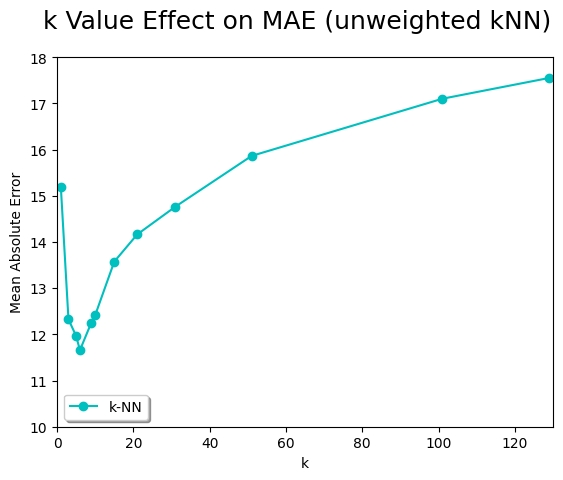

In [86]:
k_vals = [1, 3, 5, 6, 9, 10, 15, 21, 31, 51, 101, 129]
kNN_maes = []
for k in k_vals:
    my_knn = neighbors.KNeighborsRegressor(n_neighbors=k)  # Initialize with current k
    my_knn.fit(train_data, train_sln)
    predictions = my_knn.predict(test_data)
    mae = mean_absolute_error(test_sln, predictions)  # Calculate MAE
    kNN_maes.append(mae)

plt.suptitle('k Value Effect on MAE (unweighted kNN)',fontsize=18)
plt.xlabel('k')
plt.ylabel('Mean Absolute Error')
plt.plot(k_vals, kNN_maes,'co-',label='k-NN')
plt.legend(loc='lower left', shadow=True)
plt.axis([0,130,10,18])
plt.show()

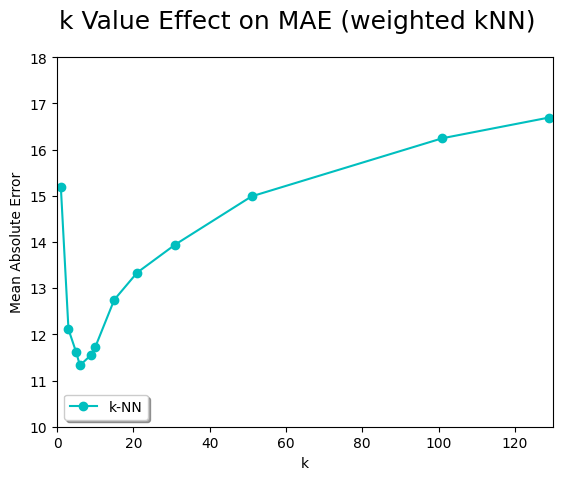

In [69]:
k_vals = [1, 3, 5, 6, 9, 10, 15, 21, 31, 51, 101, 129]
kNN_maes = []
for k in k_vals:
    my_knn = neighbors.KNeighborsRegressor(n_neighbors=k, weights='distance')  # Initialize with current k
    my_knn.fit(train_data, train_sln)
    predictions = my_knn.predict(test_data)
    mae = mean_absolute_error(test_sln, predictions)  # Calculate MAE
    kNN_maes.append(mae)

plt.suptitle('k Value Effect on MAE (weighted kNN)',fontsize=18)
plt.xlabel('k')
plt.ylabel('Mean Absolute Error')
plt.plot(k_vals, kNN_maes,'co-',label='k-NN')
plt.legend(loc='lower left', shadow=True)
plt.axis([0,130,10,18])
plt.show()

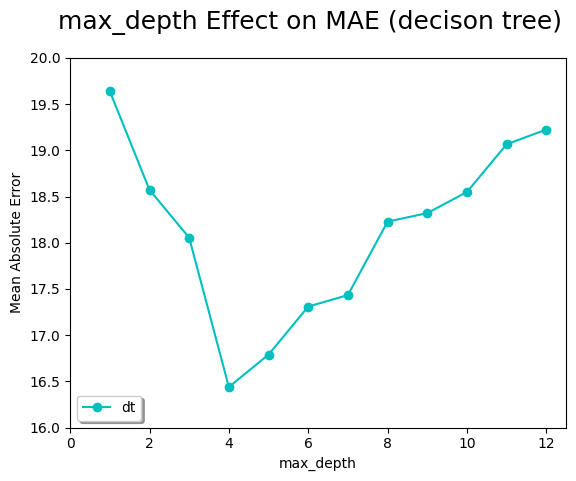

In [79]:
depth_vals = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
dt_maes = []
for d in depth_vals:
    my_dt = tree.DecisionTreeRegressor(max_depth=d)
    my_dt.fit(train_data,train_sln)
    predictions = my_dt.predict(test_data)
    mae = mean_absolute_error(test_sln, predictions)
    dt_maes.append(mae)

plt.suptitle('max_depth Effect on MAE (decison tree)',fontsize=18)
plt.xlabel('max_depth')
plt.ylabel('Mean Absolute Error')
plt.plot(depth_vals, dt_maes,'co-',label='dt')
plt.legend(loc='lower left', shadow=True)
plt.axis([0,12.5,16,20])
plt.show()

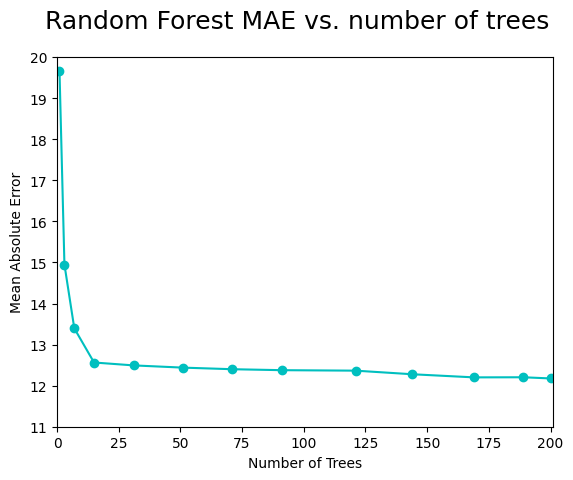

In [104]:
rf_maes = []
n_estimator_values = [1, 3, 7, 15, 31, 51, 71, 91, 121, 144, 169, 189, 200]

for n in n_estimator_values:
    my_rf = RandomForestRegressor(n_estimators=n, random_state=0)
    my_rf.fit(train_data,train_sln)
    predictions = my_rf.predict(test_data)
    mae = mean_absolute_error(test_sln, predictions)
    rf_maes.append(mae)

plt.suptitle('Random Forest MAE vs. number of trees',fontsize=18)
plt.xlabel('Number of Trees')
plt.ylabel('Mean Absolute Error')
plt.plot(n_estimator_values,rf_maes,'co-')
plt.axis([0,201,11,20])

plt.show()

#4. Analysis

What did you discover? What insights/recommendations do you have? What did you find that was interesting? Which model was your best model, which models didn't work well? Why do you think this is? In general, I want a discussion of your experiment, the results, and what they mean.

This chart might help organize your results:

| **Model**     | **Non-Normalized MAE** | **Normalized MAE** | **Parameter Tuned** |
|---------------|--------------------|----------------|---------------------|
| kNN           | 11.656             |  17.088        | best k value: 6     |
| w-kNN         | 11.328             |  16.822        | best k value: 6     |
| decision tree | 16.439             |  16.439        | best max_depth: 4   |
| random forest | 12.201             |  12.219        | best # of trees: 169 |

The best performance of a model in my experiment was the weighted kNN model on non-normalized data, which had an MAE of 11.328. It is followed closely by the unweighted kNN on non-normalized data with a slightly higher MAE of 11.656. The best performing k value on either was 6. Therefore, I would recommend using a kNN model for predicting a pokemon's speed based on this dataset.

The decision tree model performed the worst overall, with an MAE of 16.439 for both normalized and non-normalized data, which is noticeably higher than the kNN and w-kNN models. Even after tuning the max_depth parameter, it didn’t perform as well, indicating that decision trees might struggle to capture the patterns in this data for predicting speed. Random forest performed better than the decision tree with an MAE of 12.201 on the non-normalized data, likely due to its ensemble effect.

The performance of the kNN models indicates that local similarity in Pokémon stats might be a good predictor of their speed, because kNN models rely on finding similar examples in the training data. The better performance of w-kNN as opposed to regular kNN shows that giving more importance to closer neighbors provides a better estimate of speed.

One interesting thing I noticed was after normalization, the performance of all models decreased slightly in terms of MAE, which I suppose suggests that the original scale of features was already fairly informative for predicting the speed of the pokemon.

# 5. Bumps in the Road
What challenges did you encounter? How did you overcome these challenges?

One of my first challenges was figuring out how to convert the strings in the Type 1, Type 2, and Legendary columns into integers that would be able to be used in the models, so I looked it up and read scikit-learn documentation about how to use the LabelEncoder to do exactly that.

Another challenge I had was remembering how to display the graphs based on the data I had, which I was able to figure out by going back through my notes from previous classes. I still had to alter the code slightly though, to make sure it fit with what I was specifically doing in this experiment.